In [341]:
#import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [342]:
os.chdir('C:\\Users\\Payal\OneDrive\DATA GLACIER\Week 2\Data')

In [343]:
cab= pd.read_csv('Cab_Data.csv')
city= pd.read_csv('City.csv')
customerID= pd.read_csv('Customer_ID.csv')
transactionID= pd.read_csv('Transaction_ID.csv')

In [344]:
#The following was used to complete the data intake report

In [345]:
cab.shape

(1066, 8)

In [346]:
city.shape

(20, 3)

In [347]:
customerID.shape

(49171, 4)

In [348]:
transactionID.shape

(440098, 3)

In [349]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transaction ID  1066 non-null   int64  
 1   Date of Travel  1066 non-null   object 
 2   Company         1066 non-null   object 
 3   City            1066 non-null   object 
 4   KM Travelled    1066 non-null   float64
 5   Price Charged   1066 non-null   float64
 6   Cost of Trip    1066 non-null   float64
 7   Profit          1066 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 66.8+ KB


In [350]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [351]:
customerID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [352]:
transactionID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [353]:
#Make sure there are no null values
cab.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
Profit            0
dtype: int64

In [354]:
city.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [355]:
customerID.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [356]:
transactionID.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [383]:
#Seperate Pink and Yellow Cab
Pink_Cab = cab[cab['Company']=='Pink Cab']
Yellow_Cab = cab[cab['Company']=='Yellow Cab']


In [358]:

for col in cab.columns:
    if ' ' in col:
        cab = cab.rename(columns={col:col.replace(' ','_')})
        
cab.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Profit
0,10000034,31-01-16,Pink Cab,CHICAGO IL,23.20,396.73,278.400,118.330
1,10000035,01-02-16,Pink Cab,CHICAGO IL,4.48,55.27,51.520,3.750
2,10000036,02-02-16,Pink Cab,CHICAGO IL,37.76,541.76,407.808,133.952
3,10000037,03-02-16,Pink Cab,CHICAGO IL,14.56,191.33,171.808,19.522
4,10000038,04-02-16,Pink Cab,CHICAGO IL,39.55,540.93,454.825,86.105


In [359]:
for col in transactionID.columns:
    if ' ' in col:
        transactionID = transactionID.rename(columns={col:col.replace(' ','_')})
transactionID.head()

,Transaction_ID,Customer_ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [360]:
for col in customerID.columns:
    if ' ' in col:
        customerID = customerID.rename(columns={col:col.replace(' ','_')})
customerID.head()        

,Customer_ID,Gender,Age,Income_(USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [361]:
cab['Date_of_Travel'] = pd.to_datetime(cab['Date_of_Travel'], format='%d-%m-%y')

In [362]:
months=[]
years =[]
for i in range(len(cab['Date_of_Travel'])):
    months.append(cab['Date_of_Travel'][i].month)
    years.append(cab['Date_of_Travel'][i].year)
cab['Month'] = months
cab['Year'] = years

cab.drop('Date_of_Travel', axis=1, inplace=True)

In [363]:
left = cab.set_index(['Transaction_ID'])
right = transactionID.set_index(['Transaction_ID'])
data = left.join(right)
data

,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Profit,Month,Year,Customer_ID,Payment_Mode
Transaction_ID,,,,,,,,,,
10000034,Pink Cab,CHICAGO IL,23.20,396.73,278.400,118.330,1,2016,3077,Cash
10000035,Pink Cab,CHICAGO IL,4.48,55.27,51.520,3.750,2,2016,4734,Card
10000036,Pink Cab,CHICAGO IL,37.76,541.76,407.808,133.952,2,2016,4004,Card
10000037,Pink Cab,CHICAGO IL,14.56,191.33,171.808,19.522,2,2016,5528,Card
10000038,Pink Cab,CHICAGO IL,39.55,540.93,454.825,86.105,2,2016,5785,Card
...,...,...,...,...,...,...,...,...,...,...
10001394,Pink Cab,ATLANTA GA,21.63,238.02,222.789,15.231,12,2018,29654,Cash
10001395,Pink Cab,ATLANTA GA,8.12,96.30,82.012,14.288,12,2018,29150,Card
10001396,Pink Cab,AUSTIN TX,3.88,73.21,40.352,32.858,12,2018,33783,Card


In [364]:
left = data.set_index([data.index,'Customer_ID'])
right = customerID.set_index(['Customer_ID'])
data = left.join(right)
data

,,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Profit,Month,Year,Payment_Mode,Gender,Age,Income_(USD/Month)
Transaction_ID,Customer_ID,,,,,,,,,,,,
10000034,3077,Pink Cab,CHICAGO IL,23.20,396.73,278.400,118.330,1,2016,Cash,Male,22,16759
10000035,4734,Pink Cab,CHICAGO IL,4.48,55.27,51.520,3.750,2,2016,Card,Male,33,30608
10000036,4004,Pink Cab,CHICAGO IL,37.76,541.76,407.808,133.952,2,2016,Card,Male,18,3896
10000037,5528,Pink Cab,CHICAGO IL,14.56,191.33,171.808,19.522,2,2016,Card,Male,34,14974
10000038,5785,Pink Cab,CHICAGO IL,39.55,540.93,454.825,86.105,2,2016,Card,Male,21,11230
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10001394,29654,Pink Cab,ATLANTA GA,21.63,238.02,222.789,15.231,12,2018,Cash,Male,34,22378
10001395,29150,Pink Cab,ATLANTA GA,8.12,96.30,82.012,14.288,12,2018,Card,Male,18,13969
10001396,33783,Pink Cab,AUSTIN TX,3.88,73.21,40.352,32.858,12,2018,Card,Male,53,8660


In [365]:
left = data.set_index([data.index,'City'])
right = city.set_index(['City'])
data = left.join(right)
data

,,,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Profit,Month,Year,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users
Transaction_ID,Customer_ID,City,,,,,,,,,,,,,
10000034,3077,CHICAGO IL,Pink Cab,23.20,396.73,278.400,118.330,1,2016,Cash,Male,22,16759,"1,955,130","164,468"
10000035,4734,CHICAGO IL,Pink Cab,4.48,55.27,51.520,3.750,2,2016,Card,Male,33,30608,"1,955,130","164,468"
10000036,4004,CHICAGO IL,Pink Cab,37.76,541.76,407.808,133.952,2,2016,Card,Male,18,3896,"1,955,130","164,468"
10000037,5528,CHICAGO IL,Pink Cab,14.56,191.33,171.808,19.522,2,2016,Card,Male,34,14974,"1,955,130","164,468"
10000038,5785,CHICAGO IL,Pink Cab,39.55,540.93,454.825,86.105,2,2016,Card,Male,21,11230,"1,955,130","164,468"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10001394,29654,ATLANTA GA,Pink Cab,21.63,238.02,222.789,15.231,12,2018,Cash,Male,34,22378,"814,885","24,701"
10001395,29150,ATLANTA GA,Pink Cab,8.12,96.30,82.012,14.288,12,2018,Card,Male,18,13969,"814,885","24,701"
10001396,33783,AUSTIN TX,Pink Cab,3.88,73.21,40.352,32.858,12,2018,Card,Male,53,8660,"698,371","14,978"


In [366]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1066 entries, (10000034, 3077, 'CHICAGO IL') to (10001398, 57589, 'BOSTON MA')
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             1066 non-null   object 
 1   KM_Travelled        1066 non-null   float64
 2   Price_Charged       1066 non-null   float64
 3   Cost_of_Trip        1066 non-null   float64
 4   Profit              1066 non-null   float64
 5   Month               1066 non-null   int64  
 6   Year                1066 non-null   int64  
 7   Payment_Mode        1066 non-null   object 
 8   Gender              1066 non-null   object 
 9   Age                 1066 non-null   int64  
 10  Income_(USD/Month)  1066 non-null   int64  
 11  Population          1066 non-null   object 
 12  Users               1066 non-null   object 
dtypes: float64(4), int64(4), object(5)
memory usage: 195.4+ KB


In [413]:
#Check that there are no duplicate values
data[data.duplicated(subset=None,keep='first')]


,Transaction_ID,Customer_ID,City,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Profit,Month,Year,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users


In [414]:
#No duplicate values were returned

In [367]:
data = data.reset_index()

In [368]:
city_users = data.groupby('City').Users.count()
city_users

City
ATLANTA GA         32
AUSTIN TX           7
BOSTON MA          56
CHICAGO IL        214
DALLAS TX          33
DENVER CO          11
LOS ANGELES CA    168
MIAMI FL            8
NASHVILLE TN        4
NEW YORK NY       219
ORANGE COUNTY      12
PHOENIX AZ          6
PITTSBURGH PA       4
SACRAMENTO CA       7
SAN DIEGO CA       74
SEATTLE WA         39
SILICON VALLEY     27
TUCSON AZ           5
WASHINGTON DC     140
Name: Users, dtype: int64

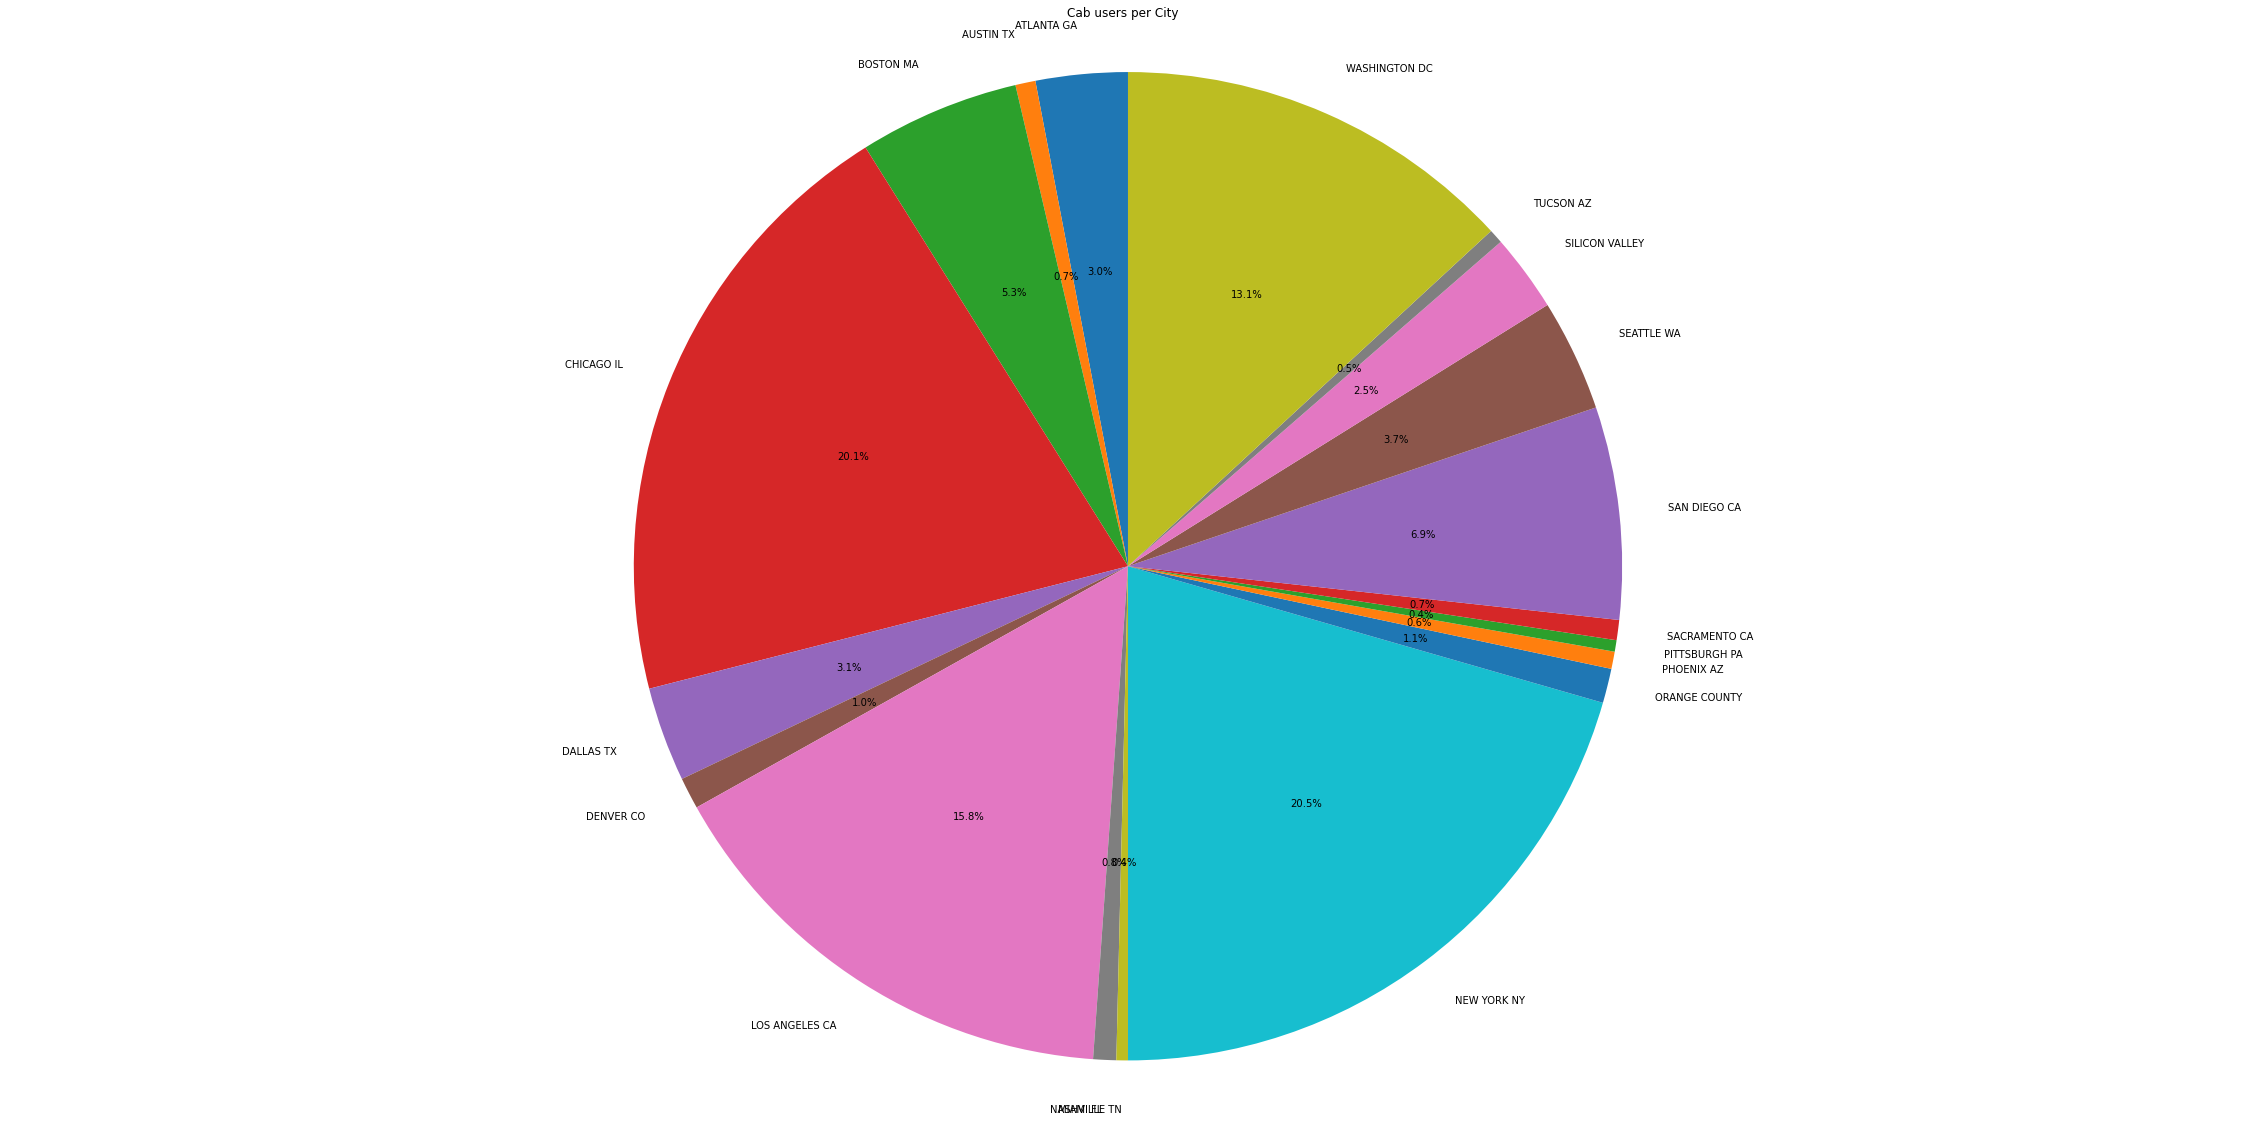

In [369]:
labs = city_users.index
vals = city_users.values
figp, axp = plt.subplots(figsize=(40,20))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=False, startangle=90,)
axp.axis('equal')

plt.title('Cab users per City')
plt.show()

In [370]:
#The highest number of cab users are in New York(20.5%), Chicago(20.1%) and Los Angeles(15.8%)

In [371]:
city_pink = data[data.Company=='Pink Cab'].groupby('City').Transaction_ID.count()
city_pink

City
ATLANTA GA         8
AUSTIN TX          2
BOSTON MA          1
CHICAGO IL        30
DALLAS TX          6
DENVER CO          4
LOS ANGELES CA    60
MIAMI FL           3
NASHVILLE TN       2
NEW YORK NY       18
ORANGE COUNTY      6
PHOENIX AZ         2
PITTSBURGH PA      2
SACRAMENTO CA      3
SAN DIEGO CA      33
SEATTLE WA        15
SILICON VALLEY    12
TUCSON AZ          2
WASHINGTON DC     12
Name: Transaction_ID, dtype: int64

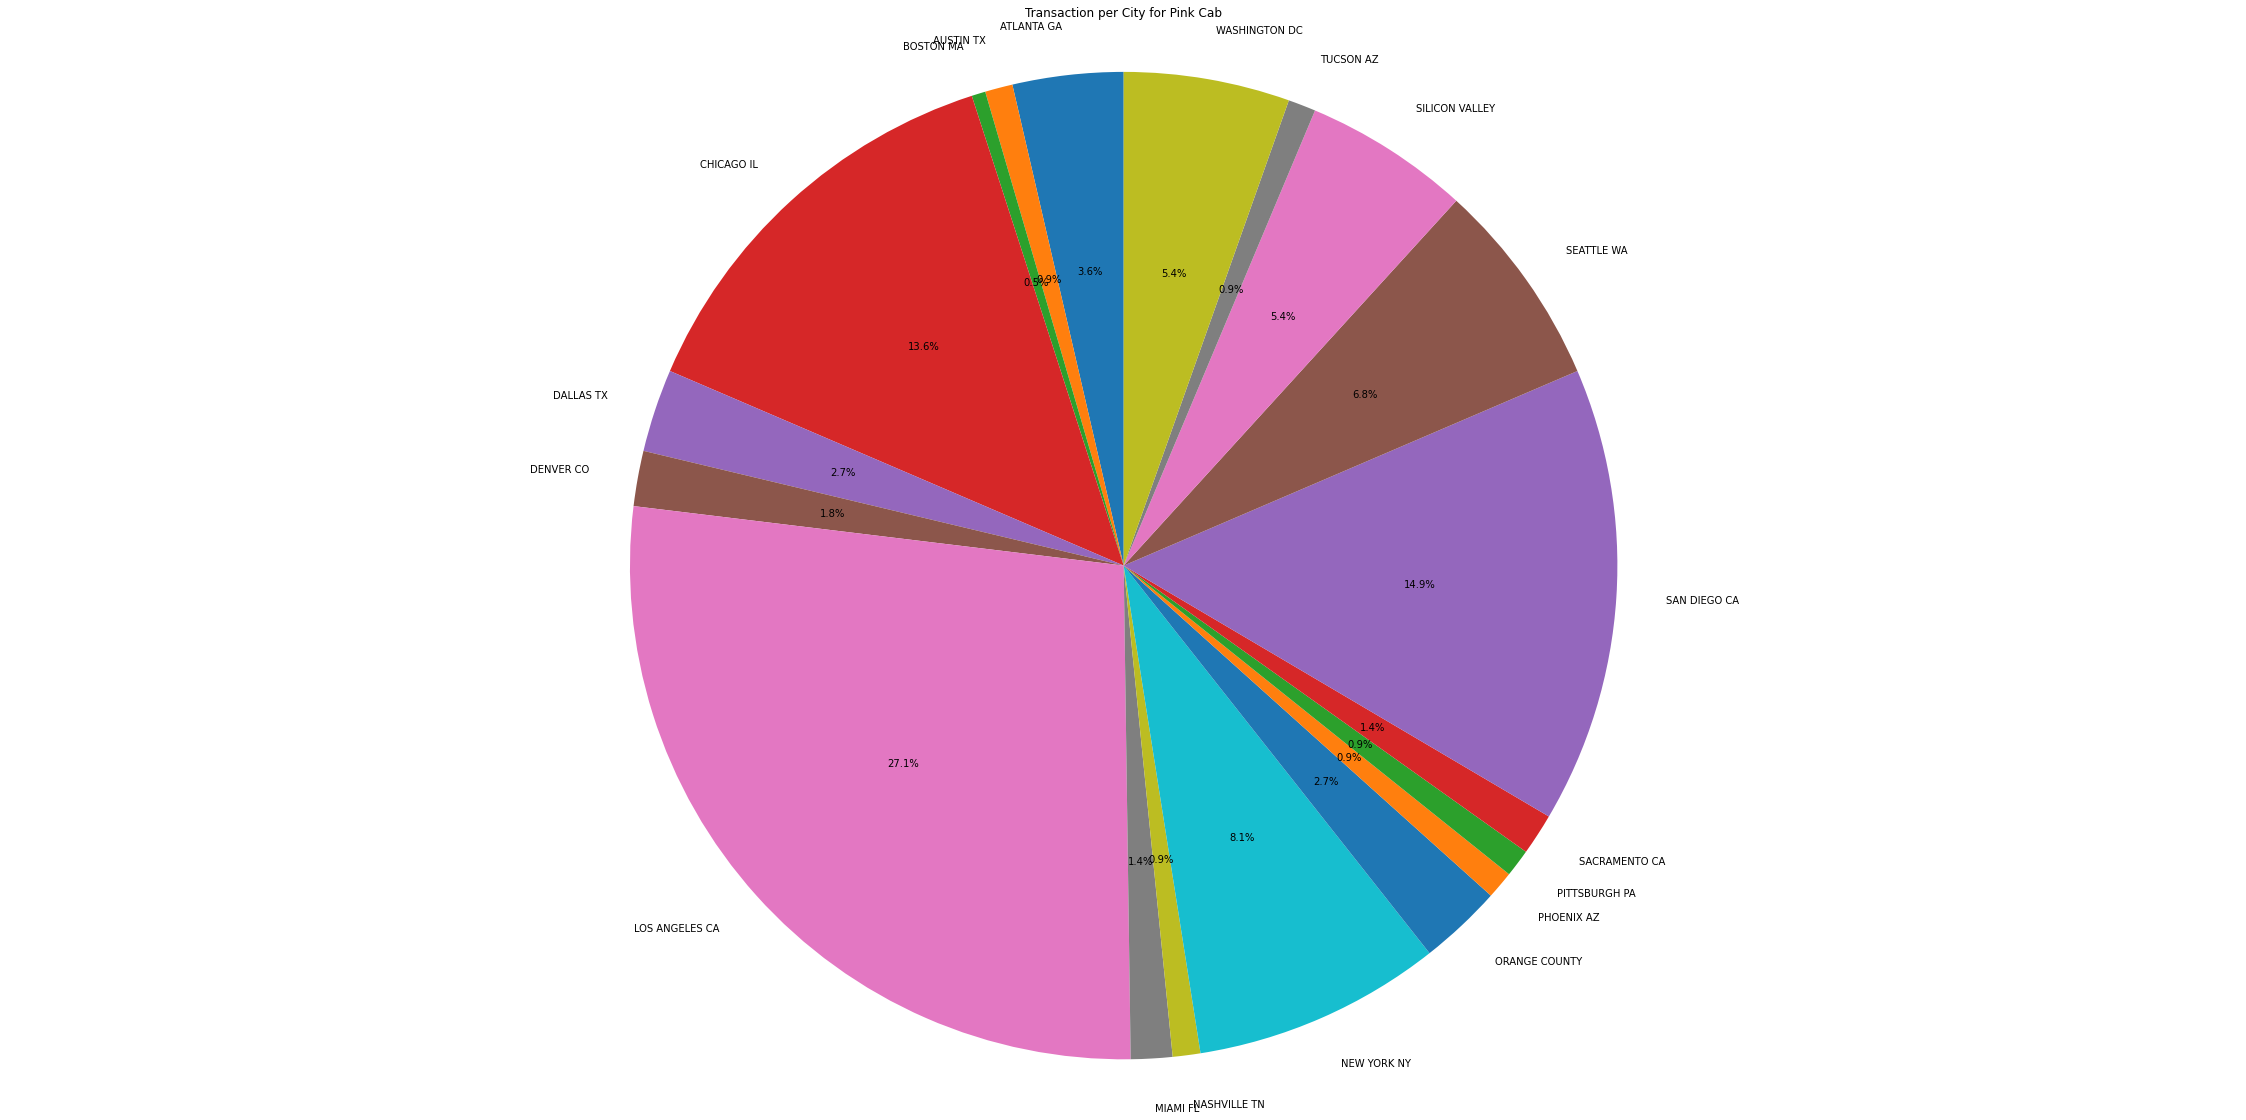

In [372]:
labs = city_pink.index
vals = city_pink.values
figp, axp = plt.subplots(figsize=(40,20))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=False, startangle=90,)
axp.axis('equal')

plt.title('Transaction per City for Pink Cab')
plt.show()

In [373]:
city_yellow = data[data.Company=='Yellow Cab'].groupby('City').Transaction_ID.count()
city_yellow

City
ATLANTA GA         24
AUSTIN TX           5
BOSTON MA          55
CHICAGO IL        184
DALLAS TX          27
DENVER CO           7
LOS ANGELES CA    108
MIAMI FL            5
NASHVILLE TN        2
NEW YORK NY       201
ORANGE COUNTY       6
PHOENIX AZ          4
PITTSBURGH PA       2
SACRAMENTO CA       4
SAN DIEGO CA       41
SEATTLE WA         24
SILICON VALLEY     15
TUCSON AZ           3
WASHINGTON DC     128
Name: Transaction_ID, dtype: int64

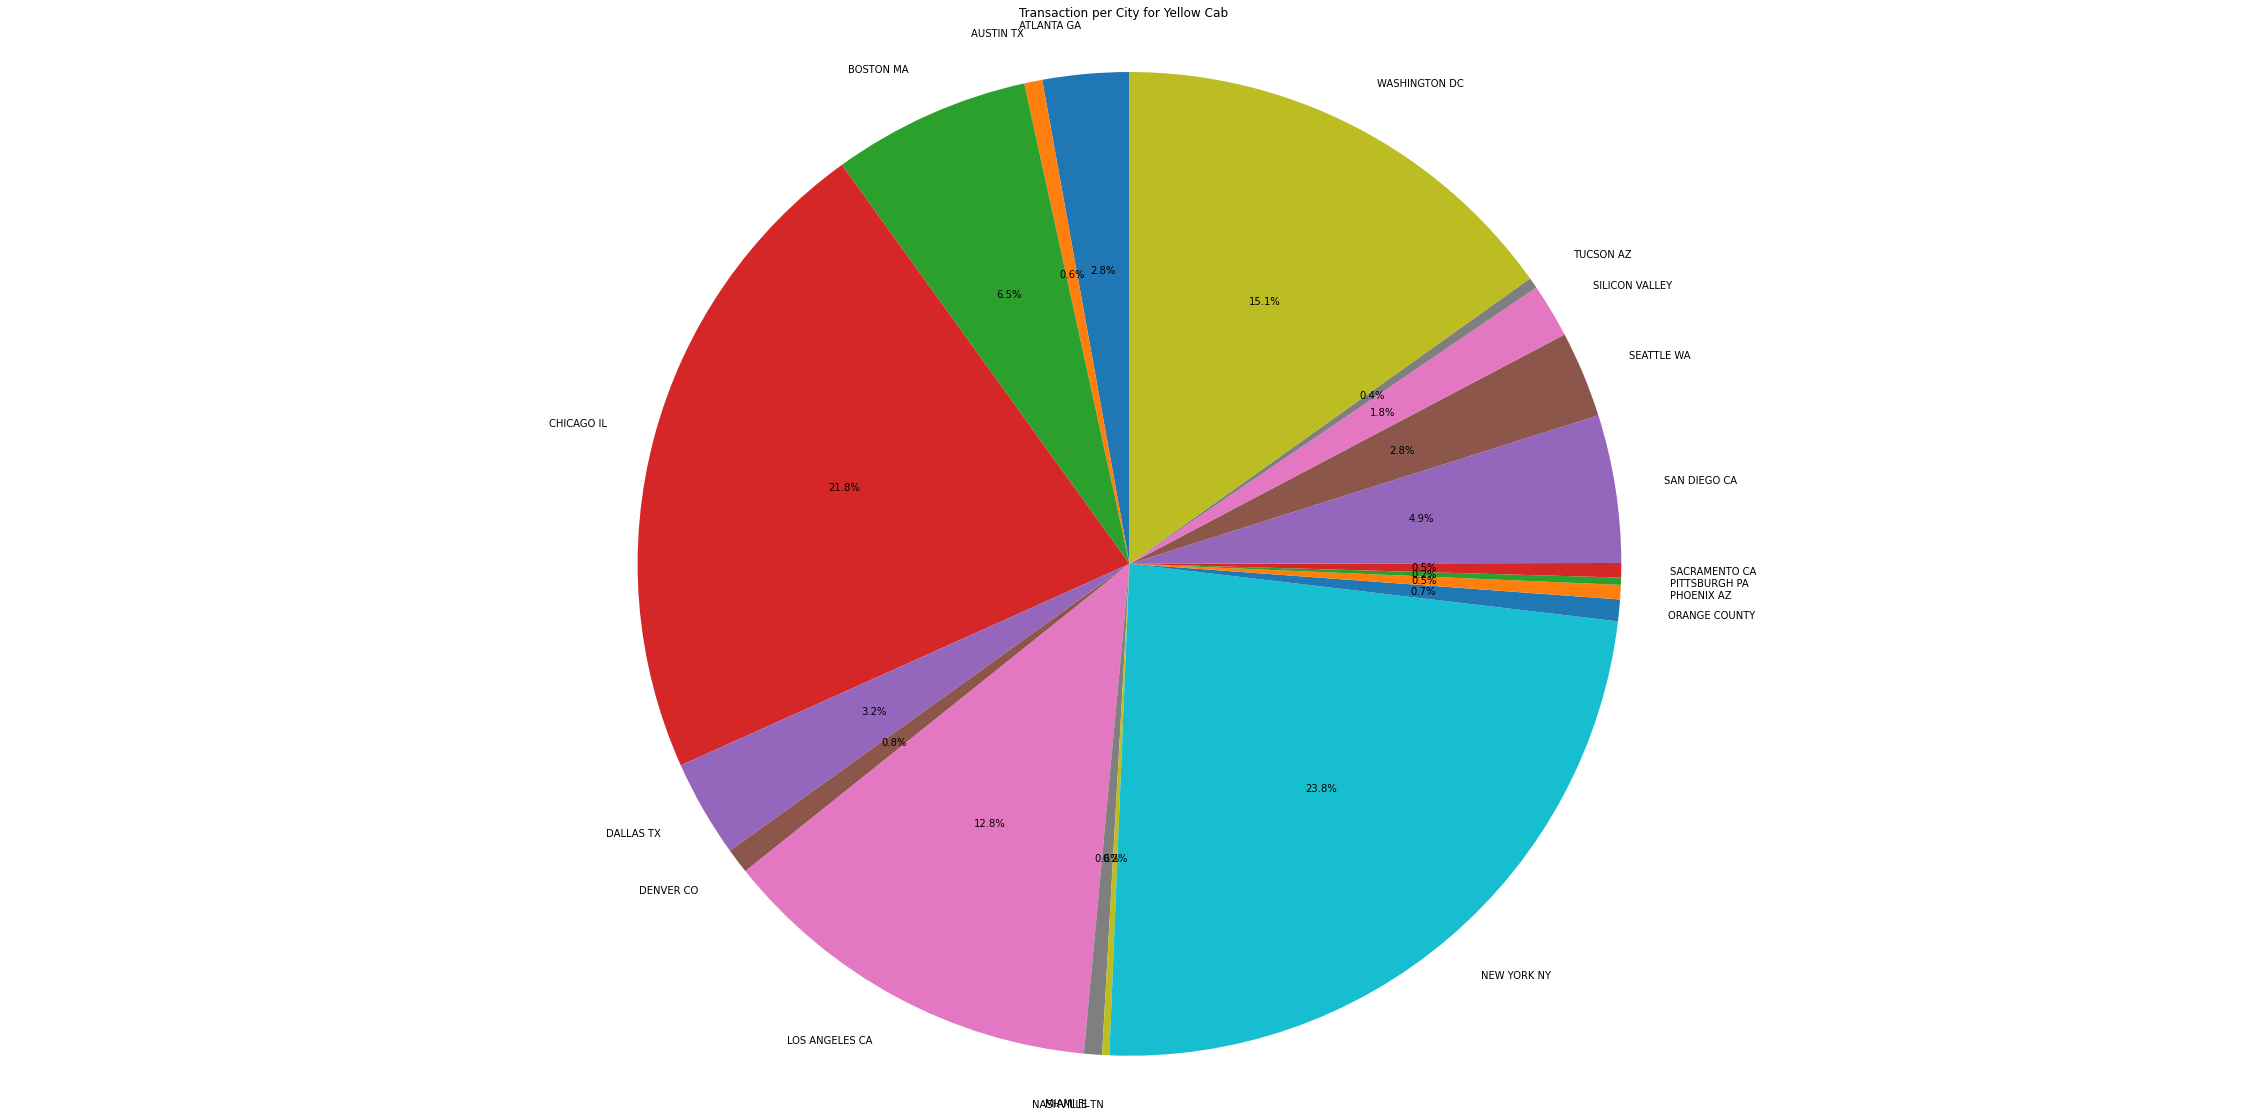

In [374]:
labs = city_yellow.index
vals = city_yellow.values
figp, axp = plt.subplots(figsize=(40,20))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=False, startangle=90,)
axp.axis('equal')

plt.title('Transaction per City for Yellow Cab')
plt.show()

In [375]:
#Transactions for Yellow Cab are highest in New York(23.8%)
#Transactions for Pink Cab are highest in Chicago(27.1%)

In [376]:
plot = cab[cab.Company=='Pink Cab'].groupby(['Month']).Transaction_ID.count()
plot

Month
1      1
2     29
3     31
4     30
5     31
6     30
7     31
8     27
12    11
Name: Transaction_ID, dtype: int64

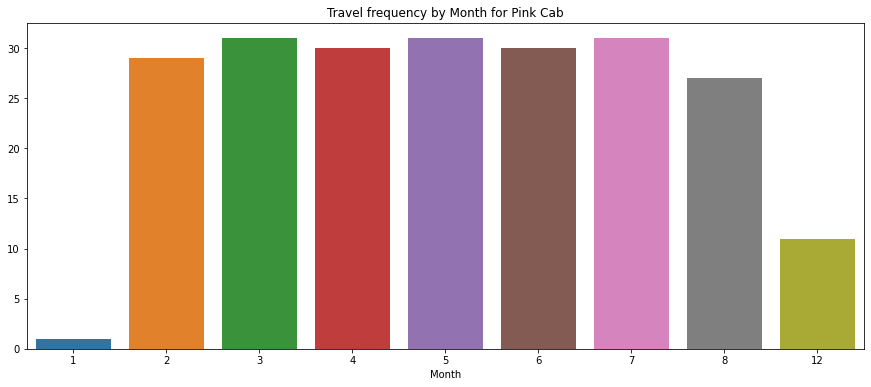

In [377]:
plt.figure(figsize=(15,6))
sns.barplot(x=plot.index,y=plot.values)
plt.title('Travel frequency by Month for Pink Cab')
plt.show()

In [378]:
plot = cab[cab.Company=='Yellow Cab'].groupby(['Month']).Transaction_ID.count()
plot

Month
1     62
2     56
3     62
4     60
5     62
6     60
7     62
8     66
9     90
10    93
11    90
12    82
Name: Transaction_ID, dtype: int64

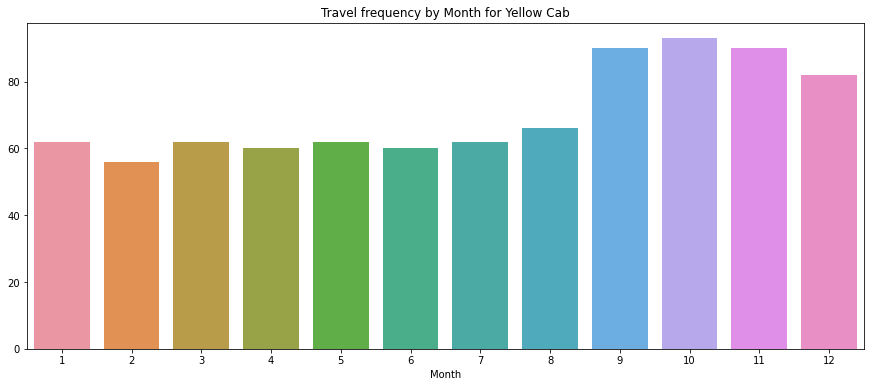

In [379]:
plt.figure(figsize=(15,6))
sns.barplot(x=plot.index,y=plot.values)
plt.title('Travel frequency by Month for Yellow Cab')
plt.show()

In [380]:
# The low frequency during the month of December and January could be due to people being on holiday and therefore staying at 
# home or travelling outside the city

Text(0.5, 0, 'Pink Cab KM Travelled')

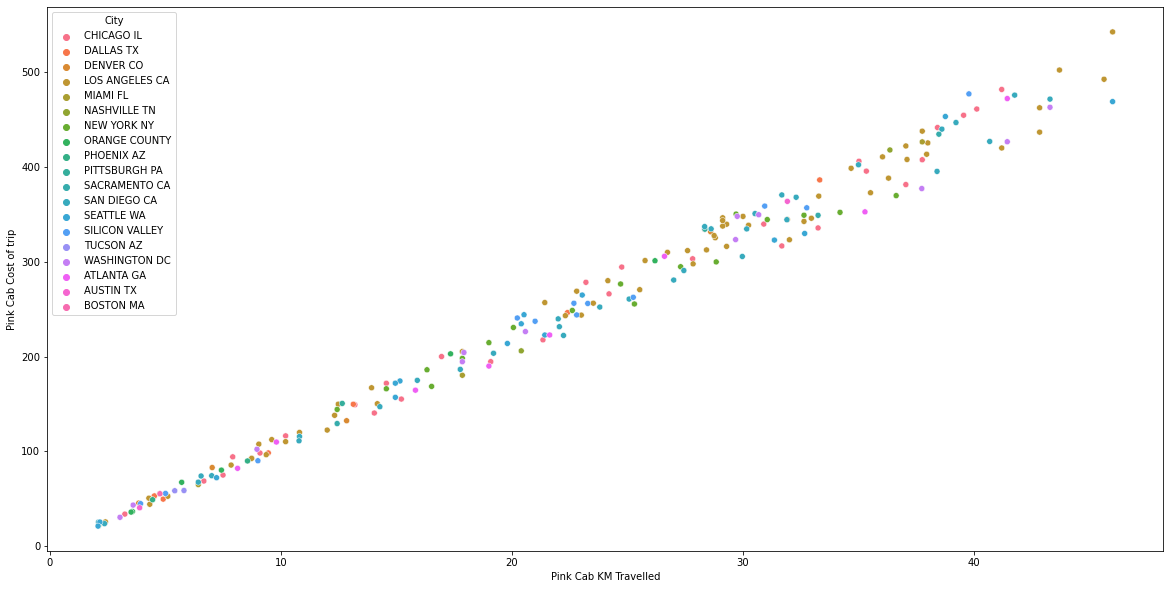

In [384]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=cab, x=Pink_Cab["KM_Travelled"], y=Pink_Cab['Cost_of_Trip'], hue="City")
plt.ylabel('Pink Cab Cost of trip')
plt.xlabel('Pink Cab KM Travelled')


Text(0.5, 0, 'Yellow Cab KM Travelled')

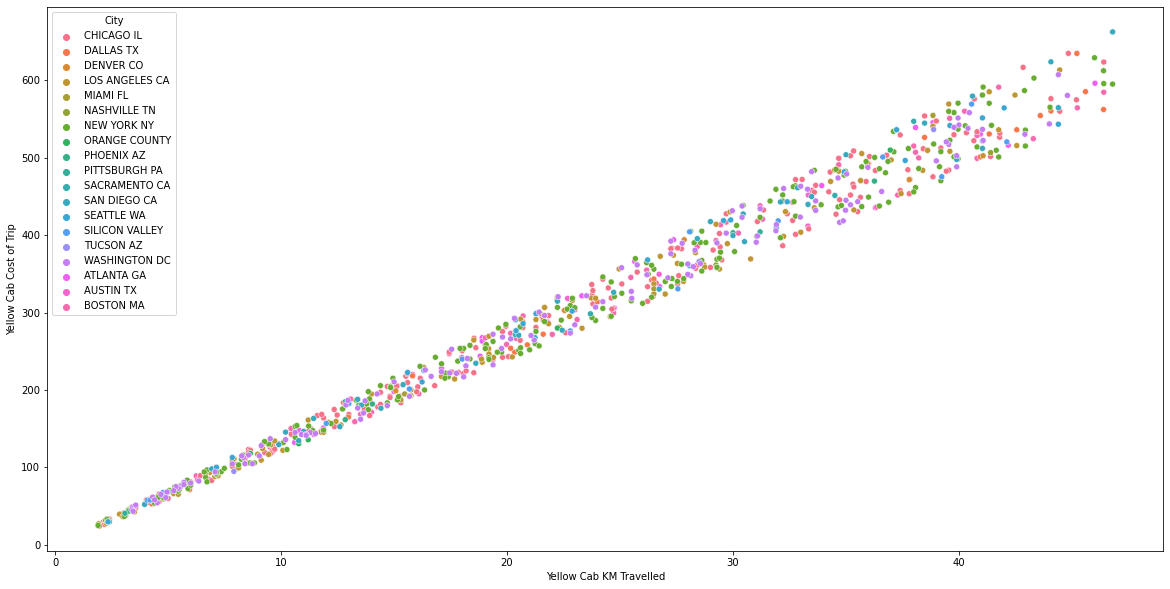

In [385]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=cab, x=Yellow_Cab["KM_Travelled"], y=Yellow_Cab['Cost_of_Trip'], hue="City")
plt.ylabel('Yellow Cab Cost of Trip')
plt.xlabel('Yellow Cab KM Travelled')

In [ ]:
# Both cabs approximately travel between 2km to 48km and the cost of trip of Yellow Cab are slightly higher

Text(0.5, 0, 'Pink Cab KM Travelled')

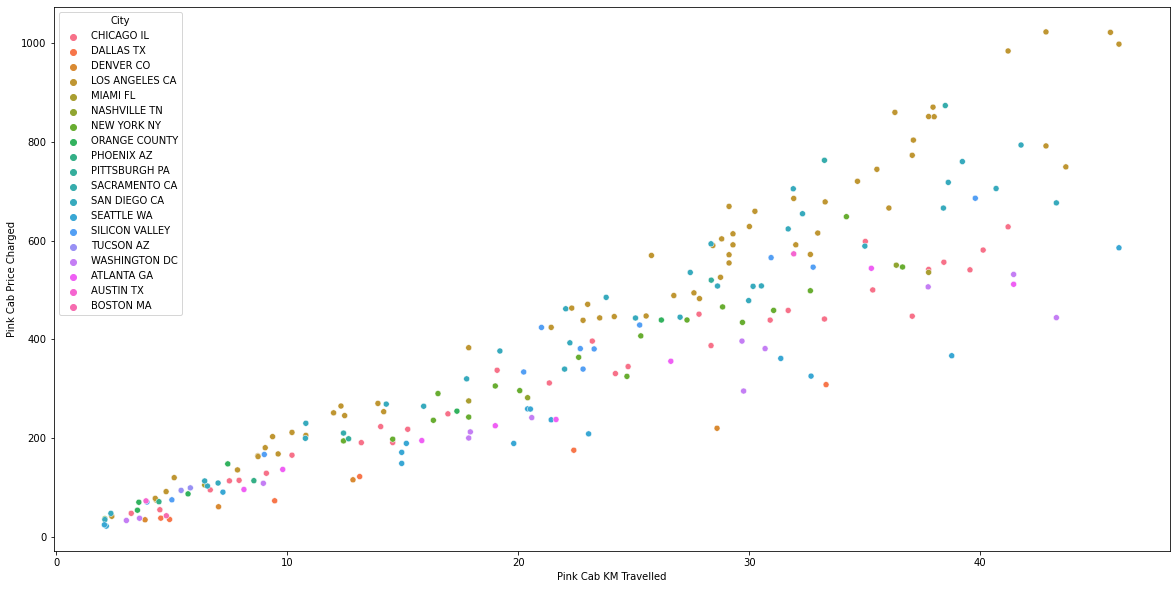

In [386]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=cab, x=Pink_Cab["KM_Travelled"], y=Pink_Cab['Price_Charged'], hue="City")
plt.ylabel('Pink Cab Price Charged')
plt.xlabel('Pink Cab KM Travelled')

Text(0.5, 0, 'Yellow Cab KM Travelled')

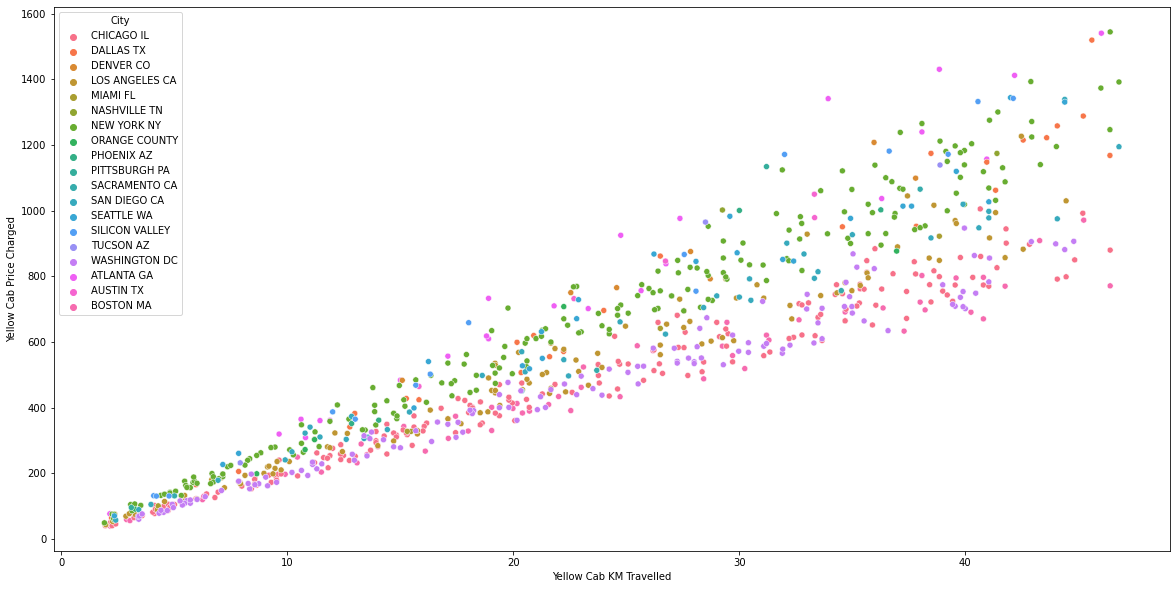

In [387]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=cab, x=Yellow_Cab["KM_Travelled"], y=Yellow_Cab['Price_Charged'], hue="City")
plt.ylabel('Yellow Cab Price Charged')
plt.xlabel('Yellow Cab KM Travelled')

In [388]:
Pink_Cab['KM_Travelled'].corr(Pink_Cab['Price_Charged'])

0.9125974617911476

In [389]:
Yellow_Cab['KM_Travelled'].corr(Yellow_Cab['Price_Charged'])

0.926955878240138

In [390]:
# There is a positive correlation between price charged and kilometers travelled for both Pink and Yellow cab. However, from the 
#above two plots we see that Yellow cab charges more per kilometers travelled.

In [391]:
plot = cab[cab.Company=='Pink Cab'].groupby(['Month']).Profit.mean()
plot

Month
1     118.330000
2      79.499759
3     166.839290
4     213.305067
5     137.735419
6     141.339967
7     106.341452
8      70.937926
12     57.601727
Name: Profit, dtype: float64

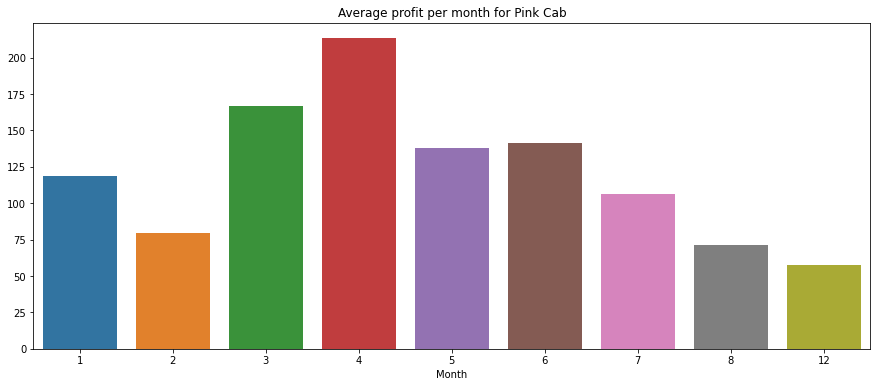

In [392]:
plt.figure(figsize=(15,6))
sns.barplot(x=plot.index,y=plot.values)
plt.title('Average profit per month for Pink Cab')
plt.show()

In [393]:
plot = cab[cab.Company=='Yellow Cab'].groupby(['Month']).Profit.mean()
plot

Month
1     295.879671
2     238.866907
3     244.541065
4     286.533747
5     311.151910
6     308.546060
7     302.731032
8     293.982230
9     247.103196
10    191.105819
11    209.462884
12    205.068927
Name: Profit, dtype: float64

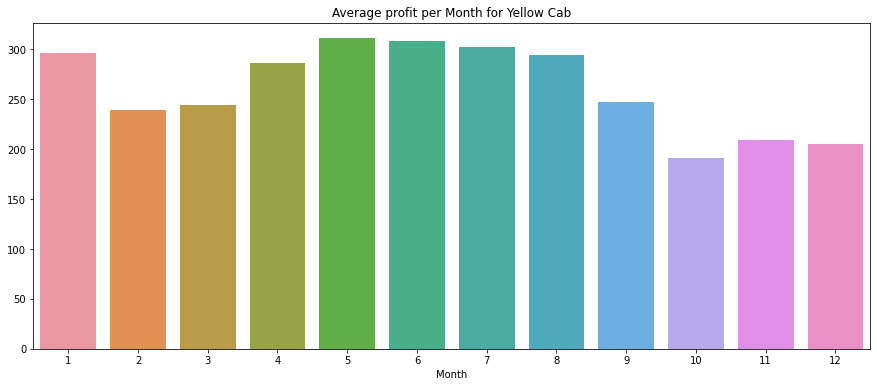

In [394]:
plt.figure(figsize=(15,6))
sns.barplot(x=plot.index,y=plot.values)
plt.title('Average profit per Month for Yellow Cab')
plt.show()

In [395]:
# We can see that Yellow Cab makes a greater profit than Pink Cab every month. There were a few negative values in Profit. These 
# were kept assuming that some passengers earned discounts on their rides.

In [396]:
df = data[['KM_Travelled','Price_Charged','Cost_of_Trip','Month','Year','Age','Income_(USD/Month)','Profit']]
df.corr()

,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Age,Income_(USD/Month),Profit
KM_Travelled,1.000000,0.897430,0.983499,-0.056483,0.021345,-0.004828,0.012132,0.703515
Price_Charged,0.897430,1.000000,0.917216,-0.059473,0.188228,-0.028082,-0.001206,0.938631
Cost_of_Trip,0.983499,0.917216,1.000000,-0.030508,0.096470,-0.013555,0.009186,0.723513
Month,-0.056483,-0.059473,-0.030508,1.000000,-0.056914,-0.005794,-0.039446,-0.076638
Year,0.021345,0.188228,0.096470,-0.056914,1.000000,-0.049494,-0.034768,0.242630
Age,-0.004828,-0.028082,-0.013555,-0.005794,-0.049494,1.000000,0.005447,-0.036924
Income_(USD/Month),0.012132,-0.001206,0.009186,-0.039446,-0.034768,0.005447,1.000000,-0.010043
Profit,0.703515,0.938631,0.723513,-0.076638,0.242630,-0.036924,-0.010043,1.000000


<AxesSubplot:>

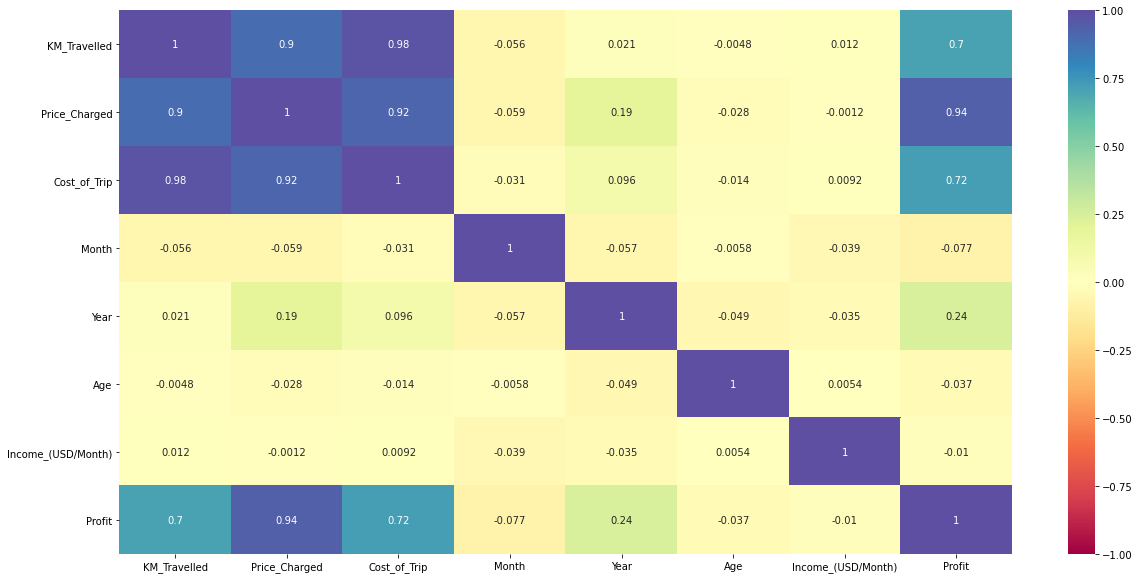

In [397]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap='Spectral')

In [398]:
#There is a strong correlation between profit and price charged

In [399]:
# We assume equal sample variances to perform t-tests

In [400]:
#Pink Cab
H0 = 'Pink Cab makes a lower profit for those aged less than 50'
HA = 'Pink Cab does not make a lower profit for those aged less than 50'
a = data[(data.Age<=50)&(data.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
b = data[(data.Age>50)&(data.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True,alternative='greater')
if(p_value<0.05):
    print( 'We reject the null hypothesis')
    print(HA)
else:
    print('We accept the null hypothesis')
    print(H0)
    
print('P value is ', p_value)

178 43
We accept the null hypothesis
Pink Cab makes a lower profit for those aged less than 50
P value is  0.09829537216689711


In [401]:
#Yellow Cab
H0 = 'Yellow Cab makes a lower profit for those aged less than 50'
HA = 'Yellow Cab does not make a lower profit for those aged less than 50'
a = data[(data.Age<=50)&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
b = data[(data.Age>50)&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True,alternative='greater')
if(p_value<0.05):
    print( 'We reject the null hypothesis')
    print(HA)
else:
    print('We accept the null hypothesis')
    print(H0)
    
print('P value is ', p_value)

730 115
We accept the null hypothesis
Yellow Cab makes a lower profit for those aged less than 50
P value is  0.4483135608595592


In [402]:

#Pink Cab
H0 = 'There is a difference in Profit for payment mode in Pink Cab'
HA = 'There is no difference in Profit for payment mode in Pink Cab'
a = data[(data.Payment_Mode=='Cash')&(data.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
b = data[(data.Payment_Mode=='Card')&(data.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print( 'We reject the null hypothesis')
    print(HA)
else:
    print('We accept the null hypothesis')
    print(H0)
    
print('P value is ', p_value)

We accept the null hypothesis
There is a difference in Profit for payment mode in Pink Cab
P value is  0.48169345291070376


In [403]:
#Yellow Cab
H0 = 'There is a difference in Profit for payment mode in Yellow Cab'
HA = 'There is no difference in Profit for payment mode in Yellow Cab'
a = data[(data.Payment_Mode=='Cash')&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
b = data[(data.Payment_Mode=='Card')&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()

from scipy import stats
_,p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print( 'We reject the null hypothesis')
    print(HA)
else:
    print('We accept the null hypothesis')
    print(H0)
    
print('P value is ', p_value)

We accept the null hypothesis
There is a difference in Profit for payment mode in Yellow Cab
P value is  0.21106909925382614


In [404]:
#Pink Cab
H0 = 'Males over 18 are charged more for the Pink Cab'
HA = 'Males over 18 are not charged more for the Pink Cab'

a = data[(data.Gender== 'Male')&(data.Company=='Pink Cab')&(data.Age>18)].groupby('Transaction_ID').Price_Charged.mean()
b = data[(data.Gender=='Male')&(data.Company=='Pink Cab')&(data.Age<=18)].groupby('Transaction_ID').Price_Charged.mean()

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True,alternative='less')
if(p_value<0.05):
    print( 'We reject the null hypothesis')
    print(HA)
else:
    print('We accept the null hypothesis')
    print(H0)
    
print('P value is ', p_value)

We accept the null hypothesis
Males over 18 are charged more for the Pink Cab
P value is  0.4484736721184605


In [405]:
#Yellow Cab
H0 = 'Males over 18 are charged more for the Yellow Cab'
HA = 'Males over 18 are not charged more for the Yellow Cab'

a = data[(data.Gender== 'Male')&(data.Company=='Yellow Cab')&(data.Age>18)].groupby('Transaction_ID').Price_Charged.mean()
b = data[(data.Gender=='Male')&(data.Company=='Yellow Cab')&(data.Age<=18)].groupby('Transaction_ID').Price_Charged.mean()

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True,alternative='less')
if(p_value<0.05):
    print( 'We reject the null hypothesis')
    print(HA)
else:
    print('We accept the null hypothesis')
    print(H0)
    
print('P value is ', p_value)

We accept the null hypothesis
Males over 18 are charged more for the Yellow Cab
P value is  0.06842629131382251


In [406]:
#Pink Cab
H0 = 'Pink Cab makes a higher profit in 2018 than 2016'
HA = 'Pink Cab does not make a higher profit in 2018 than 2016'

a = data[(data.Year== 2018)&(data.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
b = data[(data.Year== 2016)&(data.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True,alternative='less')
if(p_value<0.05):
    print( 'We reject the null hypothesis')
    print(HA)
else:
    print('We accept the null hypothesis')
    print(H0)
    
print('P value is ', p_value)

We reject the null hypothesis
Pink Cab does not make a higher profit in 2018 than 2016
P value is  0.028979438019464735


In [407]:
#Yellow Cab
H0 = 'Yellow Cab makes a higher profit in 2018 than 2016'
HA = 'Yellow Cab does not make a higher profit in 2018 than 2016'

a = data[(data.Year== 2018)&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
b = data[(data.Year== 2016)&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True,alternative='less')
if(p_value<0.05):
    print( 'We reject the null hypothesis')
    print(HA)
else:
    print('We accept the null hypothesis')
    print(H0)
    
print('P value is ', p_value)

We accept the null hypothesis
Yellow Cab makes a higher profit in 2018 than 2016
P value is  0.9970571017720896


In [408]:
#Pink Cab
H0 = 'Pink Cab makes a different average profit when travelled over 40km'
HA = 'Pink Cab does not make a different average profit when travelled over 40km'

a = data[(data.KM_Travelled>=40)&(data.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
b = data[(data.KM_Travelled<40)&(data.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print( 'We reject the null hypothesis')
    print(HA)
else:
    print('We accept the null hypothesis')
    print(H0)
    
print('P value is ', p_value)

We reject the null hypothesis
Pink Cab does not make a different average profit when travelled over 40km
P value is  6.91283578946181e-06


In [409]:
#Pink Cab
H0 = 'Yellow Cab makes a different average profit when travelled over 40km'
HA = 'Yellow Cab does not make a different average profit when travelled over 40km'

a = data[(data.KM_Travelled>=40)&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
b = data[(data.KM_Travelled<40)&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print( 'We reject the null hypothesis')
    print(HA)
else:
    print('We accept the null hypothesis')
    print(H0)
    
print('P value is ', p_value)

We reject the null hypothesis
Yellow Cab does not make a different average profit when travelled over 40km
P value is  3.908054688065589e-34
